In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
d1= pd.read_csv('training_set_features.csv')
d2=pd.read_csv('training_set_labels.csv')
d2.drop('respondent_id',axis=1, inplace=True)
d1.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df= pd.concat([d1,d2],axis=1)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


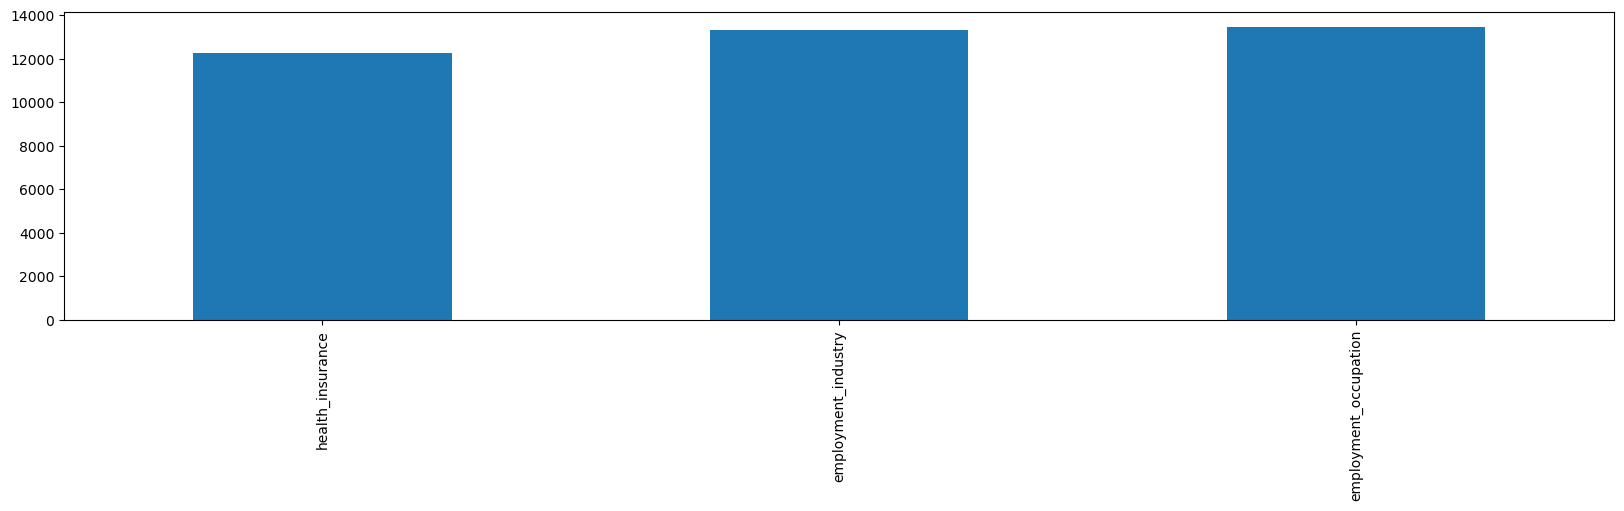

In [6]:
NA_col=df.isnull().sum()
NA_col=NA_col[NA_col.values>(0.2*len(df))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.show()

In [7]:
df.drop(['health_insurance','employment_industry','employment_occupation'],axis=1,inplace=True)
df.isna().sum()

respondent_id                     0
xyz_concern                      92
xyz_knowledge                   116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                 

In [8]:
df.xyz_concern.mean()
df.xyz_knowledge.mean()

1.2625324357865444

In [9]:
df.xyz_concern.fillna(2,inplace=True)
df.xyz_knowledge.fillna(1,inplace=True)

In [10]:
df.age_group.unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [11]:
df[df.age_group=='65+ Years'].xyz_vaccine

3        0
5        0
12       0
16       1
18       0
        ..
26685    1
26687    0
26697    0
26702    0
26706    0
Name: xyz_vaccine, Length: 6843, dtype: int64

In [12]:
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0


In [13]:
df.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'xyz_vaccine',
       'seasonal_vaccine'],
      dtype='object')

In [14]:
df.isna().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                 

In [16]:
df.behavioral_antiviral_meds.mode()

0    0.0
Name: behavioral_antiviral_meds, dtype: float64

In [17]:
df.behavioral_antiviral_meds.fillna(0.0,inplace=True)

In [18]:
df.drop(['education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa',
        'household_adults','household_children'],axis=1,inplace=True)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,0,0


In [19]:
df.isna().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
xyz_vaccine                       0
seasonal_vaccine                  0
dtype: int64

In [22]:
df.behavioral_avoidance.mode()

0    1.0
Name: behavioral_avoidance, dtype: float64

In [23]:
df.behavioral_avoidance.fillna(1.0,inplace=True)
df.isna().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
xyz_vaccine                       0
seasonal_vaccine                  0
dtype: int64

In [24]:
df.behavioral_face_mask.mode()

0    0.0
Name: behavioral_face_mask, dtype: float64

In [27]:
df.behavioral_face_mask.fillna(0.0,inplace=True)
df.isna().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
xyz_vaccine                       0
seasonal_vaccine                  0
dtype: int64

In [28]:
df.behavioral_wash_hands.mode()

0    1.0
Name: behavioral_wash_hands, dtype: float64

In [29]:
df.behavioral_wash_hands.fillna(1.0,inplace=True)
df.isna().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
xyz_vaccine                       0
seasonal_vaccine                  0
dtype: int64

In [30]:
df.behavioral_large_gatherings.mode()

0    0.0
Name: behavioral_large_gatherings, dtype: float64

In [31]:
df.behavioral_large_gatherings.fillna(0.0,inplace=True)
df.isna().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
xyz_vaccine                       0
seasonal_vaccine                  0
dtype: int64

In [32]:
df.behavioral_outside_home.mode()

0    0.0
Name: behavioral_outside_home, dtype: float64

In [33]:
df.behavioral_outside_home.fillna(0.0,inplace=True)
df.isna().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
xyz_vaccine                       0
seasonal_vaccine                  0
dtype: int64

In [34]:
df.behavioral_touch_face.mode()

0    1.0
Name: behavioral_touch_face, dtype: float64

In [36]:
df.behavioral_touch_face.fillna(0.0,inplace=True)
df.isna().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
xyz_vaccine                       0
seasonal_vaccine                  0
dtype: int64

In [37]:
df.doctor_recc_xyz.mode()

0    0.0
Name: doctor_recc_xyz, dtype: float64

In [38]:
df.doctor_recc_xyz.fillna(0.0,inplace=True)
df.isna().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_xyz                   0
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
xyz_vaccine                       0
seasonal_vaccine                  0
dtype: int64

In [40]:
df.doctor_recc_seasonal.mode()

0    0.0
Name: doctor_recc_seasonal, dtype: float64

In [42]:
df.doctor_recc_seasonal.fillna(0.0,inplace=True)
df.isna().sum()

respondent_id                    0
xyz_concern                      0
xyz_knowledge                    0
behavioral_antiviral_meds        0
behavioral_avoidance             0
behavioral_face_mask             0
behavioral_wash_hands            0
behavioral_large_gatherings      0
behavioral_outside_home          0
behavioral_touch_face            0
doctor_recc_xyz                  0
doctor_recc_seasonal             0
chronic_med_condition          971
child_under_6_months           820
health_worker                  804
opinion_xyz_vacc_effective     391
opinion_xyz_risk               388
opinion_xyz_sick_from_vacc     395
opinion_seas_vacc_effective    462
opinion_seas_risk              514
opinion_seas_sick_from_vacc    537
age_group                        0
xyz_vaccine                      0
seasonal_vaccine                 0
dtype: int64

In [44]:
df.chronic_med_condition.fillna(0.0,inplace=True)
df.isna().sum()

respondent_id                    0
xyz_concern                      0
xyz_knowledge                    0
behavioral_antiviral_meds        0
behavioral_avoidance             0
behavioral_face_mask             0
behavioral_wash_hands            0
behavioral_large_gatherings      0
behavioral_outside_home          0
behavioral_touch_face            0
doctor_recc_xyz                  0
doctor_recc_seasonal             0
chronic_med_condition            0
child_under_6_months           820
health_worker                  804
opinion_xyz_vacc_effective     391
opinion_xyz_risk               388
opinion_xyz_sick_from_vacc     395
opinion_seas_vacc_effective    462
opinion_seas_risk              514
opinion_seas_sick_from_vacc    537
age_group                        0
xyz_vaccine                      0
seasonal_vaccine                 0
dtype: int64

In [45]:
df.child_under_6_months.mode()

0    0.0
Name: child_under_6_months, dtype: float64

In [46]:
df.child_under_6_months.fillna(0.0,inplace=True)
df.isna().sum()

respondent_id                    0
xyz_concern                      0
xyz_knowledge                    0
behavioral_antiviral_meds        0
behavioral_avoidance             0
behavioral_face_mask             0
behavioral_wash_hands            0
behavioral_large_gatherings      0
behavioral_outside_home          0
behavioral_touch_face            0
doctor_recc_xyz                  0
doctor_recc_seasonal             0
chronic_med_condition            0
child_under_6_months             0
health_worker                  804
opinion_xyz_vacc_effective     391
opinion_xyz_risk               388
opinion_xyz_sick_from_vacc     395
opinion_seas_vacc_effective    462
opinion_seas_risk              514
opinion_seas_sick_from_vacc    537
age_group                        0
xyz_vaccine                      0
seasonal_vaccine                 0
dtype: int64

In [51]:
df.loc[:,['health_worker','xyz_vaccine','seasonal_vaccine']][(df.health_worker==1)].seasonal_vaccine.sum()

1876

In [52]:
df.health_worker.mode()

0    0.0
Name: health_worker, dtype: float64

In [54]:
df.health_worker.fillna(0.0,inplace=True)
df.isna().sum()

respondent_id                    0
xyz_concern                      0
xyz_knowledge                    0
behavioral_antiviral_meds        0
behavioral_avoidance             0
behavioral_face_mask             0
behavioral_wash_hands            0
behavioral_large_gatherings      0
behavioral_outside_home          0
behavioral_touch_face            0
doctor_recc_xyz                  0
doctor_recc_seasonal             0
chronic_med_condition            0
child_under_6_months             0
health_worker                    0
opinion_xyz_vacc_effective     391
opinion_xyz_risk               388
opinion_xyz_sick_from_vacc     395
opinion_seas_vacc_effective    462
opinion_seas_risk              514
opinion_seas_sick_from_vacc    537
age_group                        0
xyz_vaccine                      0
seasonal_vaccine                 0
dtype: int64

In [55]:
df.opinion_xyz_vacc_effective.mean()

3.85062319501444

In [57]:
df.opinion_xyz_vacc_effective.fillna(4.0,inplace=True)
df.isna().sum()

respondent_id                    0
xyz_concern                      0
xyz_knowledge                    0
behavioral_antiviral_meds        0
behavioral_avoidance             0
behavioral_face_mask             0
behavioral_wash_hands            0
behavioral_large_gatherings      0
behavioral_outside_home          0
behavioral_touch_face            0
doctor_recc_xyz                  0
doctor_recc_seasonal             0
chronic_med_condition            0
child_under_6_months             0
health_worker                    0
opinion_xyz_vacc_effective       0
opinion_xyz_risk               388
opinion_xyz_sick_from_vacc     395
opinion_seas_vacc_effective    462
opinion_seas_risk              514
opinion_seas_sick_from_vacc    537
age_group                        0
xyz_vaccine                      0
seasonal_vaccine                 0
dtype: int64

In [58]:
df.opinion_xyz_risk.mean()

2.3425662069227555

In [59]:
df.opinion_xyz_risk.fillna(2.0,inplace=True)
df.isna().sum()

respondent_id                    0
xyz_concern                      0
xyz_knowledge                    0
behavioral_antiviral_meds        0
behavioral_avoidance             0
behavioral_face_mask             0
behavioral_wash_hands            0
behavioral_large_gatherings      0
behavioral_outside_home          0
behavioral_touch_face            0
doctor_recc_xyz                  0
doctor_recc_seasonal             0
chronic_med_condition            0
child_under_6_months             0
health_worker                    0
opinion_xyz_vacc_effective       0
opinion_xyz_risk                 0
opinion_xyz_sick_from_vacc     395
opinion_seas_vacc_effective    462
opinion_seas_risk              514
opinion_seas_sick_from_vacc    537
age_group                        0
xyz_vaccine                      0
seasonal_vaccine                 0
dtype: int64

In [60]:
df.opinion_xyz_sick_from_vacc.mean()

2.357669504408635

In [61]:
df.opinion_xyz_sick_from_vacc.fillna(2.0,inplace=True)
df.isna().sum()

respondent_id                    0
xyz_concern                      0
xyz_knowledge                    0
behavioral_antiviral_meds        0
behavioral_avoidance             0
behavioral_face_mask             0
behavioral_wash_hands            0
behavioral_large_gatherings      0
behavioral_outside_home          0
behavioral_touch_face            0
doctor_recc_xyz                  0
doctor_recc_seasonal             0
chronic_med_condition            0
child_under_6_months             0
health_worker                    0
opinion_xyz_vacc_effective       0
opinion_xyz_risk                 0
opinion_xyz_sick_from_vacc       0
opinion_seas_vacc_effective    462
opinion_seas_risk              514
opinion_seas_sick_from_vacc    537
age_group                        0
xyz_vaccine                      0
seasonal_vaccine                 0
dtype: int64

In [62]:
df.opinion_seas_vacc_effective.mean()

4.025985902076586

In [64]:
df.opinion_seas_vacc_effective.fillna(4.0,inplace=True)
df.isna().sum()

respondent_id                    0
xyz_concern                      0
xyz_knowledge                    0
behavioral_antiviral_meds        0
behavioral_avoidance             0
behavioral_face_mask             0
behavioral_wash_hands            0
behavioral_large_gatherings      0
behavioral_outside_home          0
behavioral_touch_face            0
doctor_recc_xyz                  0
doctor_recc_seasonal             0
chronic_med_condition            0
child_under_6_months             0
health_worker                    0
opinion_xyz_vacc_effective       0
opinion_xyz_risk                 0
opinion_xyz_sick_from_vacc       0
opinion_seas_vacc_effective      0
opinion_seas_risk              514
opinion_seas_sick_from_vacc    537
age_group                        0
xyz_vaccine                      0
seasonal_vaccine                 0
dtype: int64

In [65]:
df.opinion_seas_risk.mean()

2.719161608063223

In [66]:
df.opinion_seas_risk.fillna(3.0,inplace=True)
df.isna().sum()

respondent_id                    0
xyz_concern                      0
xyz_knowledge                    0
behavioral_antiviral_meds        0
behavioral_avoidance             0
behavioral_face_mask             0
behavioral_wash_hands            0
behavioral_large_gatherings      0
behavioral_outside_home          0
behavioral_touch_face            0
doctor_recc_xyz                  0
doctor_recc_seasonal             0
chronic_med_condition            0
child_under_6_months             0
health_worker                    0
opinion_xyz_vacc_effective       0
opinion_xyz_risk                 0
opinion_xyz_sick_from_vacc       0
opinion_seas_vacc_effective      0
opinion_seas_risk                0
opinion_seas_sick_from_vacc    537
age_group                        0
xyz_vaccine                      0
seasonal_vaccine                 0
dtype: int64

In [67]:
df.opinion_seas_sick_from_vacc.mean()

2.1181123423767674

In [68]:
df.opinion_seas_sick_from_vacc.fillna(2.0,inplace=True)
df.isna().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
xyz_vaccine                    0
seasonal_vaccine               0
dtype: int64

In [69]:
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,0,0


In [70]:
df.drop('age_group',axis=1,inplace=True)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,0,0


In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model=LogisticRegression()

In [75]:
features=df.drop(['xyz_vaccine','seasonal_vaccine'],axis=1)
output1=df.loc[:,['xyz_vaccine']]
output2=df.loc[:,['seasonal_vaccine']]

In [77]:
clf=model.fit(features,output1)

C:\Users\KRRISH KAVYA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KRRISH KAVYA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
from sklearn.metrics import roc_auc_score

In [80]:
test=pd.read_csv('test_set_features.csv')
test.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [81]:
test.drop(['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa',
          'household_adults','household_children','employment_industry','employment_occupation'],axis=1,inplace=True)
test.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0


In [82]:
clf.predict_proba(test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- health_insurance


In [83]:
test.drop(['health_insurance'],axis=1,inplace=True)
test.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,5.0,1.0,1.0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,2.0,5.0,4.0,4.0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,2.0,2.0,4.0,4.0,2.0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0


In [85]:
test.isna().sum()

respondent_id                     0
xyz_concern                      85
xyz_knowledge                   122
behavioral_antiviral_meds        79
behavioral_avoidance            213
behavioral_face_mask             19
behavioral_wash_hands            40
behavioral_large_gatherings      72
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           932
child_under_6_months            813
health_worker                   789
opinion_xyz_vacc_effective      398
opinion_xyz_risk                380
opinion_xyz_sick_from_vacc      375
opinion_seas_vacc_effective     452
opinion_seas_risk               499
opinion_seas_sick_from_vacc     521
dtype: int64

In [89]:
test.xyz_concern.mean()

1.6231454005934718

In [92]:
test.xyz_concern.fillna(2,inplace=True)
test.isna().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                   122
behavioral_antiviral_meds        79
behavioral_avoidance            213
behavioral_face_mask             19
behavioral_wash_hands            40
behavioral_large_gatherings      72
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           932
child_under_6_months            813
health_worker                   789
opinion_xyz_vacc_effective      398
opinion_xyz_risk                380
opinion_xyz_sick_from_vacc      375
opinion_seas_vacc_effective     452
opinion_seas_risk               499
opinion_seas_sick_from_vacc     521
dtype: int64

In [93]:
test.xyz_knowledge.mean()

1.266042277890619

In [94]:
test.xyz_knowledge.fillna(1,inplace=True)
test.isna().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds        79
behavioral_avoidance            213
behavioral_face_mask             19
behavioral_wash_hands            40
behavioral_large_gatherings      72
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           932
child_under_6_months            813
health_worker                   789
opinion_xyz_vacc_effective      398
opinion_xyz_risk                380
opinion_xyz_sick_from_vacc      375
opinion_seas_vacc_effective     452
opinion_seas_risk               499
opinion_seas_sick_from_vacc     521
dtype: int64

In [95]:
test.behavioral_antiviral_meds.mode()

0    0.0
Name: behavioral_antiviral_meds, dtype: float64

In [96]:
test.behavioral_antiviral_meds.fillna(0.0,inplace=True)
test.isna().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance            213
behavioral_face_mask             19
behavioral_wash_hands            40
behavioral_large_gatherings      72
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           932
child_under_6_months            813
health_worker                   789
opinion_xyz_vacc_effective      398
opinion_xyz_risk                380
opinion_xyz_sick_from_vacc      375
opinion_seas_vacc_effective     452
opinion_seas_risk               499
opinion_seas_sick_from_vacc     521
dtype: int64

In [97]:
test.behavioral_avoidance.mode()

0    1.0
Name: behavioral_avoidance, dtype: float64

In [98]:
test.behavioral_avoidance.fillna(1.0,inplace=True)
test.isna().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask             19
behavioral_wash_hands            40
behavioral_large_gatherings      72
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           932
child_under_6_months            813
health_worker                   789
opinion_xyz_vacc_effective      398
opinion_xyz_risk                380
opinion_xyz_sick_from_vacc      375
opinion_seas_vacc_effective     452
opinion_seas_risk               499
opinion_seas_sick_from_vacc     521
dtype: int64

In [99]:
test.behavioral_face_mask.mode()

0    0.0
Name: behavioral_face_mask, dtype: float64

In [100]:
test.behavioral_face_mask.fillna(0.0,inplace=True)
test.isna().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands            40
behavioral_large_gatherings      72
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           932
child_under_6_months            813
health_worker                   789
opinion_xyz_vacc_effective      398
opinion_xyz_risk                380
opinion_xyz_sick_from_vacc      375
opinion_seas_vacc_effective     452
opinion_seas_risk               499
opinion_seas_sick_from_vacc     521
dtype: int64

In [101]:
test.behavioral_wash_hands.mode()

0    1.0
Name: behavioral_wash_hands, dtype: float64

In [102]:
test.behavioral_wash_hands.fillna(1.0,inplace=True)
test.isna().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings      72
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           932
child_under_6_months            813
health_worker                   789
opinion_xyz_vacc_effective      398
opinion_xyz_risk                380
opinion_xyz_sick_from_vacc      375
opinion_seas_vacc_effective     452
opinion_seas_risk               499
opinion_seas_sick_from_vacc     521
dtype: int64

In [103]:
test.behavioral_large_gatherings.mode()

0    0.0
Name: behavioral_large_gatherings, dtype: float64

In [104]:
test.behavioral_large_gatherings.fillna(0.0,inplace=True)
test.isna().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           932
child_under_6_months            813
health_worker                   789
opinion_xyz_vacc_effective      398
opinion_xyz_risk                380
opinion_xyz_sick_from_vacc      375
opinion_seas_vacc_effective     452
opinion_seas_risk               499
opinion_seas_sick_from_vacc     521
dtype: int64

In [105]:
test.behavioral_outside_home.mode()

0    0.0
Name: behavioral_outside_home, dtype: float64

In [106]:
test.behavioral_outside_home.fillna(0.0,inplace=True)
test.isna().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           932
child_under_6_months            813
health_worker                   789
opinion_xyz_vacc_effective      398
opinion_xyz_risk                380
opinion_xyz_sick_from_vacc      375
opinion_seas_vacc_effective     452
opinion_seas_risk               499
opinion_seas_sick_from_vacc     521
dtype: int64

In [107]:
test.behavioral_touch_face.mode()

0    1.0
Name: behavioral_touch_face, dtype: float64

In [108]:
test.behavioral_touch_face.fillna(1.0,inplace=True)
test.isna().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           932
child_under_6_months            813
health_worker                   789
opinion_xyz_vacc_effective      398
opinion_xyz_risk                380
opinion_xyz_sick_from_vacc      375
opinion_seas_vacc_effective     452
opinion_seas_risk               499
opinion_seas_sick_from_vacc     521
dtype: int64

In [109]:
test.doctor_recc_xyz.mode()

0    0.0
Name: doctor_recc_xyz, dtype: float64

In [110]:
test.doctor_recc_xyz.fillna(0.0,inplace=True)
test.isna().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_xyz                   0
doctor_recc_seasonal           2160
chronic_med_condition           932
child_under_6_months            813
health_worker                   789
opinion_xyz_vacc_effective      398
opinion_xyz_risk                380
opinion_xyz_sick_from_vacc      375
opinion_seas_vacc_effective     452
opinion_seas_risk               499
opinion_seas_sick_from_vacc     521
dtype: int64

In [112]:
test.doctor_recc_seasonal.mode()

0    0.0
Name: doctor_recc_seasonal, dtype: float64

In [113]:
test.doctor_recc_seasonal.fillna(0.0,inplace=True)
test.isna().sum()

respondent_id                    0
xyz_concern                      0
xyz_knowledge                    0
behavioral_antiviral_meds        0
behavioral_avoidance             0
behavioral_face_mask             0
behavioral_wash_hands            0
behavioral_large_gatherings      0
behavioral_outside_home          0
behavioral_touch_face            0
doctor_recc_xyz                  0
doctor_recc_seasonal             0
chronic_med_condition          932
child_under_6_months           813
health_worker                  789
opinion_xyz_vacc_effective     398
opinion_xyz_risk               380
opinion_xyz_sick_from_vacc     375
opinion_seas_vacc_effective    452
opinion_seas_risk              499
opinion_seas_sick_from_vacc    521
dtype: int64

In [114]:
test.chronic_med_condition.mode()

0    0.0
Name: chronic_med_condition, dtype: float64

In [115]:
test.chronic_med_condition.fillna(0.0,inplace=True)
test.isna().sum()

respondent_id                    0
xyz_concern                      0
xyz_knowledge                    0
behavioral_antiviral_meds        0
behavioral_avoidance             0
behavioral_face_mask             0
behavioral_wash_hands            0
behavioral_large_gatherings      0
behavioral_outside_home          0
behavioral_touch_face            0
doctor_recc_xyz                  0
doctor_recc_seasonal             0
chronic_med_condition            0
child_under_6_months           813
health_worker                  789
opinion_xyz_vacc_effective     398
opinion_xyz_risk               380
opinion_xyz_sick_from_vacc     375
opinion_seas_vacc_effective    452
opinion_seas_risk              499
opinion_seas_sick_from_vacc    521
dtype: int64

In [116]:
test.child_under_6_months.mode()

0    0.0
Name: child_under_6_months, dtype: float64

In [117]:
test.child_under_6_months.fillna(0.0,inplace=True)
test.isna().sum()

respondent_id                    0
xyz_concern                      0
xyz_knowledge                    0
behavioral_antiviral_meds        0
behavioral_avoidance             0
behavioral_face_mask             0
behavioral_wash_hands            0
behavioral_large_gatherings      0
behavioral_outside_home          0
behavioral_touch_face            0
doctor_recc_xyz                  0
doctor_recc_seasonal             0
chronic_med_condition            0
child_under_6_months             0
health_worker                  789
opinion_xyz_vacc_effective     398
opinion_xyz_risk               380
opinion_xyz_sick_from_vacc     375
opinion_seas_vacc_effective    452
opinion_seas_risk              499
opinion_seas_sick_from_vacc    521
dtype: int64

In [118]:
test.health_worker.mode()

0    0.0
Name: health_worker, dtype: float64

In [119]:
test.health_worker.fillna(0.0,inplace=True)
test.isna().sum()

respondent_id                    0
xyz_concern                      0
xyz_knowledge                    0
behavioral_antiviral_meds        0
behavioral_avoidance             0
behavioral_face_mask             0
behavioral_wash_hands            0
behavioral_large_gatherings      0
behavioral_outside_home          0
behavioral_touch_face            0
doctor_recc_xyz                  0
doctor_recc_seasonal             0
chronic_med_condition            0
child_under_6_months             0
health_worker                    0
opinion_xyz_vacc_effective     398
opinion_xyz_risk               380
opinion_xyz_sick_from_vacc     375
opinion_seas_vacc_effective    452
opinion_seas_risk              499
opinion_seas_sick_from_vacc    521
dtype: int64

In [120]:
test.opinion_xyz_vacc_effective.mean()

3.844621816799696

In [121]:
test.opinion_xyz_vacc_effective.fillna(4.0,inplace=True)
test.isna().sum()

respondent_id                    0
xyz_concern                      0
xyz_knowledge                    0
behavioral_antiviral_meds        0
behavioral_avoidance             0
behavioral_face_mask             0
behavioral_wash_hands            0
behavioral_large_gatherings      0
behavioral_outside_home          0
behavioral_touch_face            0
doctor_recc_xyz                  0
doctor_recc_seasonal             0
chronic_med_condition            0
child_under_6_months             0
health_worker                    0
opinion_xyz_vacc_effective       0
opinion_xyz_risk               380
opinion_xyz_sick_from_vacc     375
opinion_seas_vacc_effective    452
opinion_seas_risk              499
opinion_seas_sick_from_vacc    521
dtype: int64

In [122]:
test.opinion_xyz_risk.mean()

2.326838347006989

In [123]:
test.opinion_xyz_risk.fillna(2.0,inplace=True)
test.isna().sum()

respondent_id                    0
xyz_concern                      0
xyz_knowledge                    0
behavioral_antiviral_meds        0
behavioral_avoidance             0
behavioral_face_mask             0
behavioral_wash_hands            0
behavioral_large_gatherings      0
behavioral_outside_home          0
behavioral_touch_face            0
doctor_recc_xyz                  0
doctor_recc_seasonal             0
chronic_med_condition            0
child_under_6_months             0
health_worker                    0
opinion_xyz_vacc_effective       0
opinion_xyz_risk                 0
opinion_xyz_sick_from_vacc     375
opinion_seas_vacc_effective    452
opinion_seas_risk              499
opinion_seas_sick_from_vacc    521
dtype: int64

In [124]:
test.opinion_xyz_sick_from_vacc.mean()

2.3606121596475904

In [125]:
test.opinion_xyz_sick_from_vacc.fillna(2.0,inplace=True)
test.isna().sum()

respondent_id                    0
xyz_concern                      0
xyz_knowledge                    0
behavioral_antiviral_meds        0
behavioral_avoidance             0
behavioral_face_mask             0
behavioral_wash_hands            0
behavioral_large_gatherings      0
behavioral_outside_home          0
behavioral_touch_face            0
doctor_recc_xyz                  0
doctor_recc_seasonal             0
chronic_med_condition            0
child_under_6_months             0
health_worker                    0
opinion_xyz_vacc_effective       0
opinion_xyz_risk                 0
opinion_xyz_sick_from_vacc       0
opinion_seas_vacc_effective    452
opinion_seas_risk              499
opinion_seas_sick_from_vacc    521
dtype: int64

In [126]:
test.opinion_seas_vacc_effective.mean()

4.024832419256551

In [127]:
test.opinion_seas_vacc_effective.fillna(4.0,inplace=True)
test.isna().sum()

respondent_id                    0
xyz_concern                      0
xyz_knowledge                    0
behavioral_antiviral_meds        0
behavioral_avoidance             0
behavioral_face_mask             0
behavioral_wash_hands            0
behavioral_large_gatherings      0
behavioral_outside_home          0
behavioral_touch_face            0
doctor_recc_xyz                  0
doctor_recc_seasonal             0
chronic_med_condition            0
child_under_6_months             0
health_worker                    0
opinion_xyz_vacc_effective       0
opinion_xyz_risk                 0
opinion_xyz_sick_from_vacc       0
opinion_seas_vacc_effective      0
opinion_seas_risk              499
opinion_seas_sick_from_vacc    521
dtype: int64

In [128]:
test.opinion_seas_risk.mean()

2.708687855316876

In [129]:
test.opinion_seas_risk.fillna(3.0,inplace=True)
test.isna().sum()

respondent_id                    0
xyz_concern                      0
xyz_knowledge                    0
behavioral_antiviral_meds        0
behavioral_avoidance             0
behavioral_face_mask             0
behavioral_wash_hands            0
behavioral_large_gatherings      0
behavioral_outside_home          0
behavioral_touch_face            0
doctor_recc_xyz                  0
doctor_recc_seasonal             0
chronic_med_condition            0
child_under_6_months             0
health_worker                    0
opinion_xyz_vacc_effective       0
opinion_xyz_risk                 0
opinion_xyz_sick_from_vacc       0
opinion_seas_vacc_effective      0
opinion_seas_risk                0
opinion_seas_sick_from_vacc    521
dtype: int64

In [130]:
test.opinion_seas_sick_from_vacc.mean()

2.143391759269867

In [131]:
test.opinion_seas_sick_from_vacc.fillna(2.0,inplace=True)
test.isna().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
dtype: int64

In [174]:
xyz= LogisticRegression()

In [176]:
xyz_model=xyz.fit(features,output1)

C:\Users\KRRISH KAVYA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KRRISH KAVYA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [177]:
xyz_res=pd.DataFrame(xyz_model.predict_proba(test),columns=['vaccine','xyz_vaccine'])
xyz_res.head()

,vaccine,xyz_vaccine
0,0.959524,0.040476
1,0.886119,0.113881
2,0.888678,0.111322
3,0.304315,0.695685
4,0.870547,0.129453


In [178]:
xyz_res.drop('vaccine',axis=1,inplace=True)
xyz_res.head()

,xyz_vaccine
0,0.040476
1,0.113881
2,0.111322
3,0.695685
4,0.129453


In [179]:
sub=pd.concat([test.respondent_id,xyz_res],axis=1)
sub.head()

,respondent_id,xyz_vaccine
0,26707,0.040476
1,26708,0.113881
2,26709,0.111322
3,26710,0.695685
4,26711,0.129453


In [180]:
seas= LogisticRegression()

In [181]:
seas_model=seas.fit(features,output2)

C:\Users\KRRISH KAVYA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [182]:
seas_res=pd.DataFrame(seas_model.predict_proba(test),columns=['vaccine','seasonal_vaccine'])
seas_res.head()

,vaccine,seasonal_vaccine
0,0.698794,0.301206
1,0.693935,0.306065
2,0.582918,0.417082
3,0.350201,0.649799
4,0.595506,0.404494


In [183]:
seas_res.drop('vaccine',axis=1,inplace=True)

In [184]:
seas_res.head()

,seasonal_vaccine
0,0.301206
1,0.306065
2,0.417082
3,0.649799
4,0.404494


In [186]:
sub=pd.concat([sub,seas_res],axis=1)

In [187]:
sub.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.040476,0.301206
1,26708,0.113881,0.306065
2,26709,0.111322,0.417082
3,26710,0.695685,0.649799
4,26711,0.129453,0.404494


In [188]:
sub.to_csv('submission.csv')